In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'

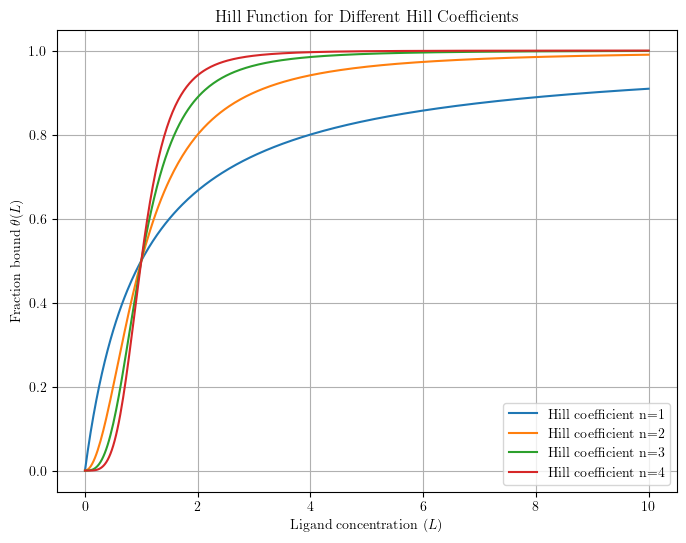

<Figure size 640x480 with 0 Axes>

In [2]:
# Plotting the Hill function for different Hill coefficients

# Define the Hill function
def hill_function(L, Kd, n):
    return (L**n) / (Kd**n + L**n)

# Parameters
Kd = 1  # dissociation constant
L = np.linspace(0, 10, 400)  # ligand concentration

# Plot the Hill function for different Hill coefficients
plt.figure(figsize=(8, 6))

for n in [1, 2, 3, 4]:
    plt.plot(L, hill_function(L, Kd, n), label=f'Hill coefficient n={n}')

plt.title('Hill Function for Different Hill Coefficients')
plt.xlabel(r'Ligand concentration ($L$)')
plt.ylabel(r'Fraction bound $\theta (L)$')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('../figures/plot_hill_function.png', dpi = 300)

In [3]:
time = 20
t_span = [0,time]
t_eval = np.linspace(t_span[0], t_span[1], 500)

In [4]:
def hill(t, Kd, n):
    return (t**n) / (Kd**n + t**n)

In [5]:
alpha1 = hill(t_eval, 1, 2)
alpha2 = 1 - hill(t_eval, 1, 2)

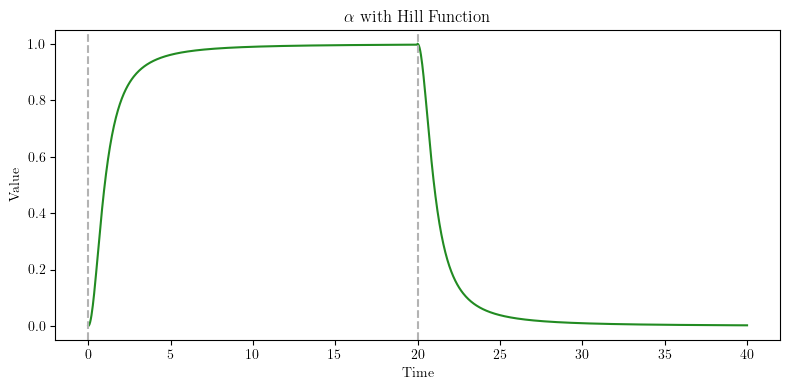

In [6]:
a_color = 'forestgreen'

plt.figure(figsize=(8,4))
plt.plot(t_eval, alpha1, color=a_color)
plt.plot(t_eval + time, alpha2, color=a_color)
plt.axvline(time, color='0.7', linestyle='--')
plt.axvline(0, color='0.7', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(r'$\alpha$ with Hill Function')
plt.tight_layout()
plt.savefig('../figures/plot_alpha_hill.png', dpi = 300)

In [7]:
def system_up(t, y, Kd, n, beta=1, gamma=0.6):
    u, s = y
    alpha = hill(t, Kd, n)
    du_dt = alpha - u
    ds_dt = beta * u - gamma * s
    return [du_dt, ds_dt]

def system_down(t, y, Kd, n, beta = 1, gamma=0.6):
    u, s = y
    alpha = 1 - hill(t, Kd, n)
    du_dt = alpha - u
    ds_dt = beta * u - gamma * s
    return [du_dt, ds_dt]

In [8]:
def plot_system(Kd1, n1, Kd2, n2, beta, gamma, time, save = False, start_point = None):
    if start_point is None:
        start_point = [0, 0]

    t_span = [0,time]
    t_eval = np.linspace(t_span[0], t_span[1], time * 10)

    sol_up = solve_ivp(system_up, t_span, start_point, args=(Kd1, n1, beta, gamma), t_eval=t_eval)
    sol_down = solve_ivp(system_down, t_span, [sol_up.y[0][-1], sol_up.y[1][-1]], args=(Kd2, n2, beta, gamma), t_eval=t_eval)

    alpha1 = hill(t_eval, Kd, n)
    alpha2 = 1 - hill(t_eval, Kd, n)
    
    a_color = 'forestgreen'
    u_color = 'darkorchid'
    s_color = 'darkorange'

    fig, axs = plt.subplots(1, 2, figsize=(15, 5), width_ratios=[1, 2])

    axs[0].plot(sol_up.y[1], sol_up.y[0], label='Induction', color = 'firebrick')
    axs[0].plot(sol_down.y[1], sol_down.y[0], label='Repression', color='royalblue')
    s_line = np.linspace(0, sol_up.y[1][-1], 400)
    u_line = gamma / beta * s_line
    axs[0].plot(s_line, u_line, label=r'$u = \frac{\gamma}{\beta} s$', color='0.3', linestyle='--')
    axs[0].set_xlabel(r'$s(t)$')
    axs[0].set_ylabel(r'$u(t)$')
    axs[0].legend()
    axs[0].set_title(r'$u(t)$ vs. $s(t)$')

    axs[1].axvline(x=time, color='0.7', linestyle='--')
    axs[1].axvline(x=0, color='0.7', linestyle='--')

    if plot_a:
        axs[1].plot(t_eval, alpha1, label=r'$\alpha (t)$', color=a_color)
        axs[1].plot(t_eval + time, alpha2, color=a_color)

    axs[1].plot(sol_up.t, sol_up.y[0], label=r'$u(t)$', color = u_color)
    axs[1].plot(sol_down.t + time, sol_down.y[0], color=u_color)
    axs[1].plot(sol_up.t, sol_up.y[1], label=r'$s(t)$', color = s_color)
    axs[1].plot(sol_down.t + time, sol_down.y[1], color=s_color)
    axs[1].set_ylabel(r'Value')
    axs[1].set_xlabel(r'Time ($t$)')
    axs[1].set_title(r'Value vs. Time')
    plt.tight_layout()
    plt.legend(loc = 'upper right')

    if isinstance(save, str):
        plt.savefig(save, dpi = 300)


    

In [10]:
sol_up = solve_ivp(system_up, t_span, [0, 0], args=(1,2), t_eval=t_eval)
sol_down = solve_ivp(system_down, t_span, [sol_up.y[0][-1], sol_up.y[1][-1]], args=(1,2), t_eval=t_eval)

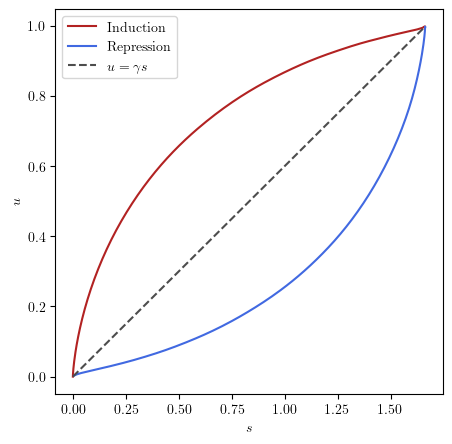

In [11]:
plt.figure(figsize=(5,5))
plt.plot(sol_up.y[1], sol_up.y[0], label='Induction', color = 'firebrick')
plt.plot(sol_down.y[1], sol_down.y[0], label='Repression', color = 'royalblue')

s_line = np.linspace(0, sol_up.y[0][-1]/0.6, 400)
u_line = 0.6 * s_line
plt.plot(s_line, u_line, label=r'$u = \gamma s$', color='0.3', linestyle='--')

plt.xlabel(r'$s$')
plt.ylabel(r'$u$')
plt.legend()

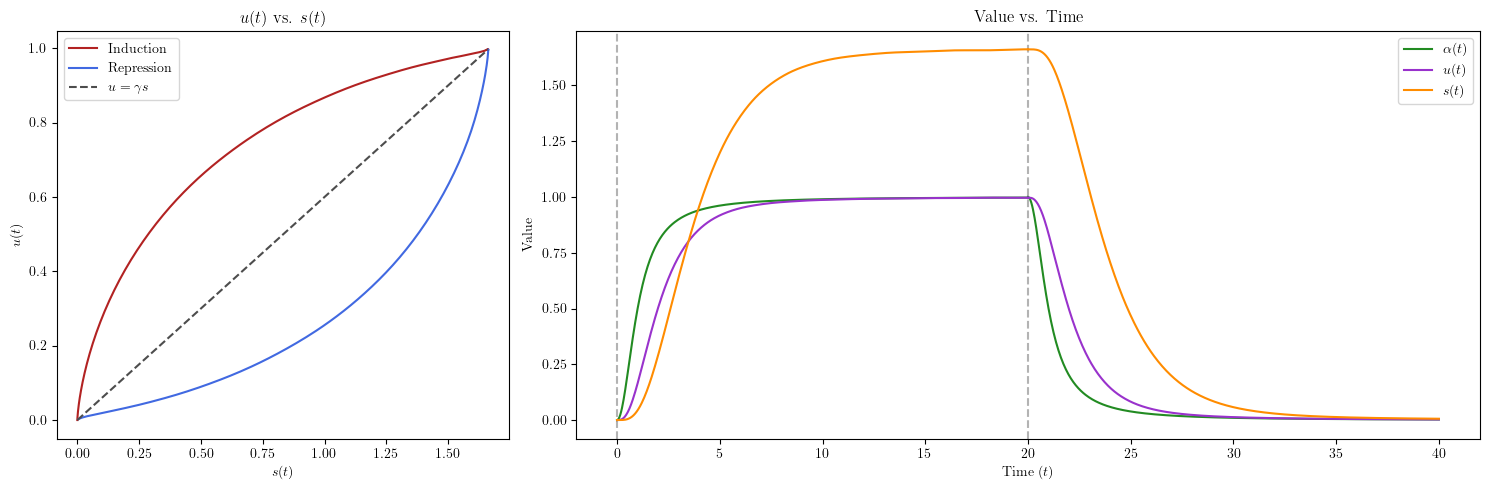

In [12]:
u_color = 'darkorchid'
s_color = 'darkorange'

plot_a = True

fig, axs = plt.subplots(1, 2, figsize=(15, 5), width_ratios=[1, 2])

axs[0].plot(sol_up.y[1], sol_up.y[0], label='Induction', color = 'firebrick')
axs[0].plot(sol_down.y[1], sol_down.y[0], label='Repression', color='royalblue')
s_line = np.linspace(0, sol_up.y[0][-1]/0.6, 400)
u_line = 0.6 * s_line
axs[0].plot(s_line, u_line, label=r'$u = \gamma s$', color='0.3', linestyle='--')
axs[0].set_xlabel(r'$s(t)$')
axs[0].set_ylabel(r'$u(t)$')
axs[0].legend()
axs[0].set_title(r'$u(t)$ vs. $s(t)$')

axs[1].axvline(x=time, color='0.7', linestyle='--')
axs[1].axvline(x=0, color='0.7', linestyle='--')

if plot_a:
    axs[1].plot(t_eval, alpha1, label=r'$\alpha (t)$', color=a_color)
    axs[1].plot(t_eval + time, alpha2, color=a_color)

axs[1].plot(sol_up.t, sol_up.y[0], label=r'$u(t)$', color = u_color)
axs[1].plot(sol_down.t + time, sol_down.y[0], color=u_color)
axs[1].plot(sol_up.t, sol_up.y[1], label=r'$s(t)$', color = s_color)
axs[1].plot(sol_down.t + time, sol_down.y[1], color=s_color)
axs[1].set_ylabel(r'Value')
axs[1].set_xlabel(r'Time ($t$)')
axs[1].set_title(r'Value vs. Time')
plt.tight_layout()
plt.legend(loc = 'upper right')

if plot_a:
    plt.savefig('../figures/fig2_ode_hill_explained_witha.png', dpi = 300)
else:
    plt.savefig('../figures/fig2_ode_hill_explained.png', dpi = 300)

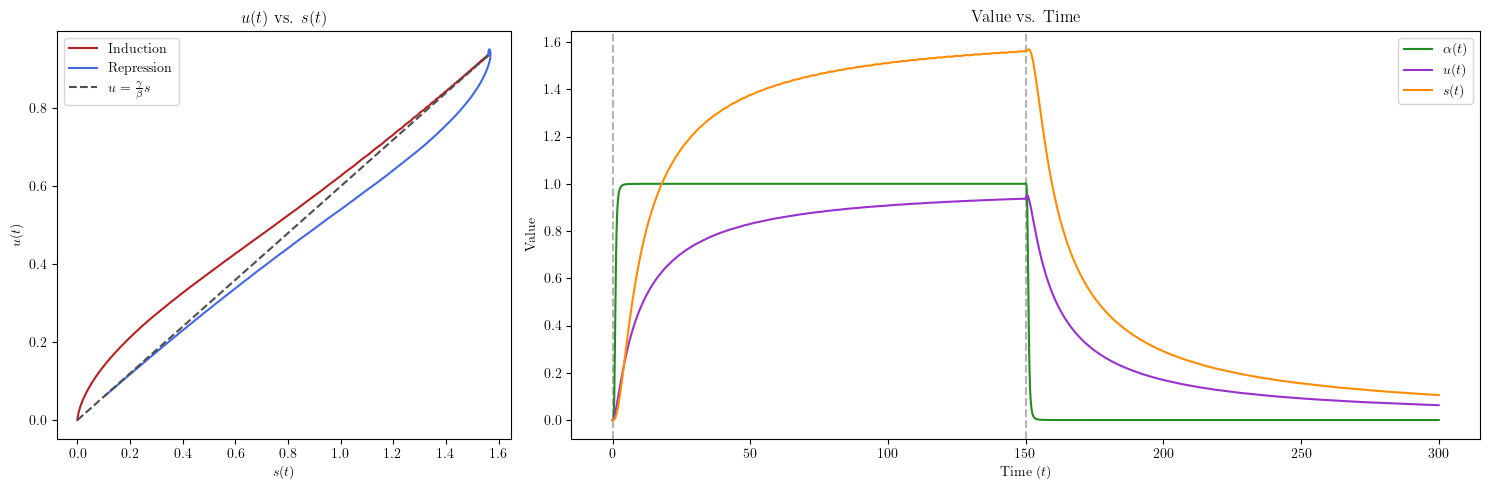

In [25]:
plot_system(Kd1=10, n1=1, Kd2=10, n2=1, beta = 1, gamma = 0.6, time = 150, save='../figures/fig4_ode_with_hill_K110_K210.png')